In [1]:
import sys
print('python: {}'.format(sys.version))
import scipy
print('scipy: {}'.format(scipy.__version__))
import numpy
print('numpy: {}'.format(numpy.__version__))
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
import pandas
print('pandas: {}'.format(pandas.__version__))
import sklearn
print('sklearn: {}'.format(sklearn.__version__))


python: 3.7.4 (default, Aug  9 2019, 18:22:51) [MSC v.1915 32 bit (Intel)]
scipy: 1.3.1
numpy: 1.16.5
matplotlib: 3.1.1
pandas: 0.25.1
sklearn: 0.21.1


In [2]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names=['sepal-length','sepal-width','petal-length','petal-width','class']
dataset=pandas.read_csv(url,names=names)

In [3]:
print(dataset.shape)

(150, 5)


In [4]:
import pandas 
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [5]:
dataset.head()

sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [6]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [7]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


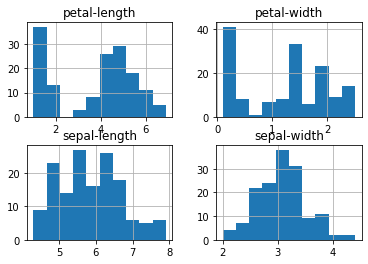

In [8]:
dataset.hist()
plt.show()

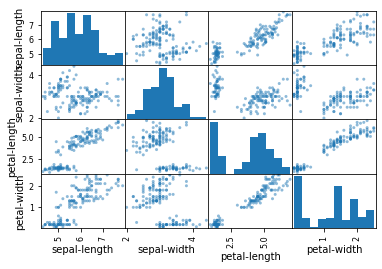

In [9]:
scatter_matrix(dataset)
plt.show()

In [11]:
array=dataset.values
X=array[:,0:4]
Y=array[:,4]
validation_size=0.20
seed=6
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,test_size=validation_size,random_state=seed)

In [12]:
seed=6
scoring='accuracy'

In [13]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590

In [14]:
X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

In [15]:
mean_x=np.mean(X)
mean_y=np.mean(Y)
n=len(X)
numer=0
denom=0
for i in range(n):
    numer+=(X[i]-mean_x)*(Y[i]-mean_y)
    denom+=(X[i]-mean_x)**2
    b1=numer/denom
    b0=mean_y - (b1 * mean_x)
    print(b1, b0)
    

0.28146265041713114 260.0405213179042
0.27944720086046 267.36464799883413
0.21375579817788407 506.08665098948643
0.20999399289007883 519.7570196601783
0.28035789953905893 264.05517668602647
0.27934490207246887 267.73640093111294
0.2868130790498729 240.59710881781712
0.28712689411350895 239.45670752479214
0.2860485884126271 243.3752613421707
0.2844763439317853 249.08878451766395
0.2717976737725513 295.16296488332296
0.2717081005564223 295.48847319484366
0.27194237715992337 294.63711399473857
0.294239971714564 213.60784354852944
0.28212866077126314 257.6202453113292
0.28795896441154306 236.43297108342654
0.28099537273250413 261.73860448056723
0.27684883344479927 276.80709326019394
0.23361861275900037 433.90535042039824
0.2169540767774588 494.46413354832475
0.21854175193534553 488.69453542266695
0.2082100682197233 526.2397868580338
0.2060808674661902 533.9772844284341
0.20545411005461087 536.2549155730214
0.23469201606689213 430.00461185777533
0.24017027603760743 410.0966613542379
0.24827

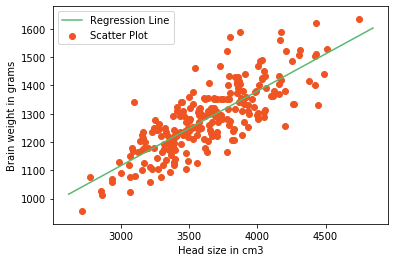

In [16]:
max_x =np.max(X) +100
min_x =np.min(X) -100
x=np.linspace(min_x,max_x, 1000)
y=b0 + b1 * x
plt.plot(x, y,color='#58b970',label='Regression Line')
plt.scatter(X,Y,c='#ef5423',label='Scatter Plot')
plt.xlabel('Head size in cm3')
plt.ylabel('Brain weight in grams')
plt.legend()
plt.show()

In [17]:
ss_t = 0
ss_r = 0
for i in range(n):
    y_pred = b0 + b1 *X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
    r2= 1 - (ss_r/ss_t)
    print(r2)

0.9958950355937317
0.9930334168921119
0.7936151796577758
0.7703980911278169
0.7371393836392426
0.7319389090898232
0.7185629263729214
0.7194453237297279
0.6938097573444924
0.7077209331583538
0.6520042673917661
0.668427665879743
0.652542914207552
0.6988967700160785
0.6448749632051656
0.6515644279449095
0.6154513045464711
0.6056726912078056
0.4740296460441803
0.4705467788825971
0.47960098789465044
0.44453440861280946
0.4357198551548078
0.4325393312808833
0.586363932950786
0.6280944709253291
0.6389251318374127
0.6473222361646865
0.6380076386127869
0.6495447114135169
0.6502336483953326
0.64441810824364
0.6452933299919559
0.653217246752722
0.6648092559134295
0.6447142435441466
0.6275832206028721
0.6280319375822943
0.6277113944605088
0.6282755728229532
0.6301886900033373
0.6235281778989201
0.6479957487699856
0.6119256756916132
0.6134448148114726
0.6209399648765481
0.6396827575121135
0.6380844619242751
0.6376359206317408
0.6375209524355095
0.6212096784774924
0.6223856421465062
0.60891091875234

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X=X.reshape((n,1))
reg=LinearRegression()
reg=reg.fit(X, Y)
Y_pred=reg.predict(X)
r2_score=reg.score(X, Y)
print(r2_score)

0.639311719957


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math


titanic_data=pd.read_csv("train.csv")
titanic_data.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [20]:
print("# total number of passangers in original data:"+str(len(titanic_data.index)))

# total number of passangers in original data:891


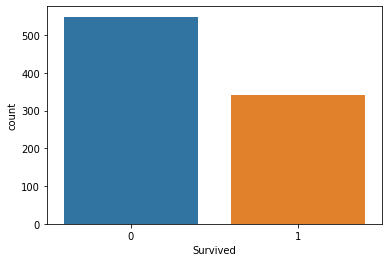

In [21]:
sns.countplot(x="Survived",data=titanic_data)

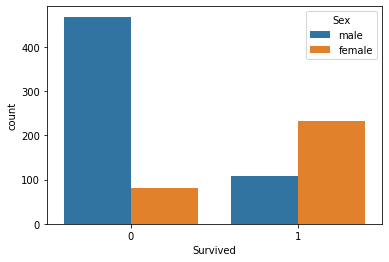

In [22]:
sns.countplot(x="Survived",hue="Sex", data=titanic_data)

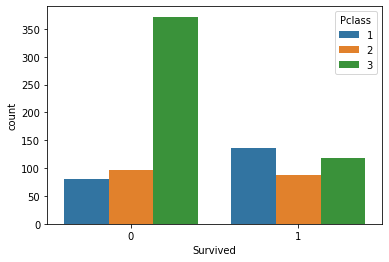

In [23]:
sns.countplot(x="Survived",hue="Pclass",data=titanic_data)

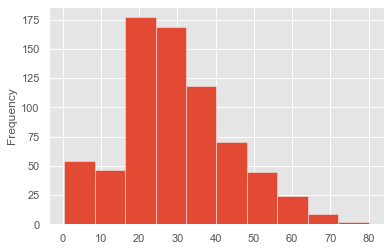

In [163]:
titanic_data["Age"].plot.hist()

In [164]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


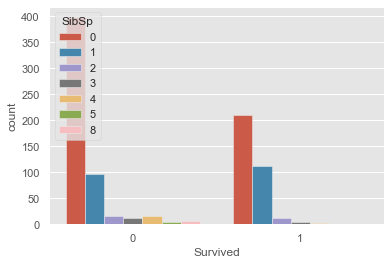

In [165]:
sns.countplot(x="Survived",hue="SibSp",data=titanic_data)

In [166]:
titanic_data.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

In [167]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

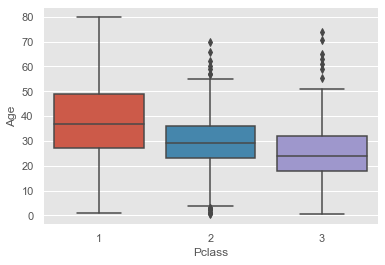

In [168]:
sns.boxplot(x="Pclass",y="Age",data=titanic_data)

In [169]:
titanic_data.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [170]:
titanic_data.drop("Cabin",axis=1,inplace=True)

In [171]:
titanic_data.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [172]:
titanic_data.dropna(inplace=True)

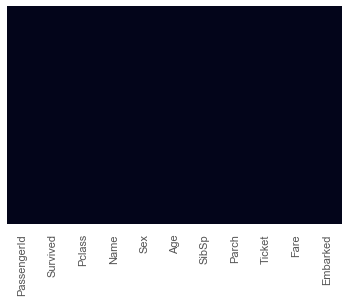

In [173]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False)

In [174]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [177]:
pd.get_dummies(titanic_data['Sex'],drop_first=True)

male
0       1
1       0
2       0
3       0
4       1
..    ...
885     0
886     1
887     0
889     1
890     1

[712 rows x 1 columns]

In [178]:
sex=pd.get_dummies(titanic_data["Sex"],drop_first=True)
sex.head(5)

male
0     1
1     0
2     0
3     0
4     1

In [179]:
embark=pd.get_dummies(titanic_data["Embarked"],drop_first=True)
embark.head(5)

Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1

In [180]:
pcl=pd.get_dummies(titanic_data["Pclass"],drop_first=True)
pcl.head(5)

2  3
0  0  1
1  0  0
2  0  1
3  0  0
4  0  1

In [181]:
titanic_data=pd.concat([titanic_data,sex,embark,pcl],axis=1)

In [182]:
titanic_data.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  male  Q  S  2  3  
0      0         A/5 21171   7.2500        S     1  0  1  0  1  
1      0          PC 17599  71.2833        C     0  0  0  0  0  
2      0  STON/O2. 3101282   7.9250        S     0  0  1  0  1  
3      0            113803  53.1000        S     0  0  1  0  0  
4      0            373450   8.0500        S     1  0  1  0  1

In [183]:
titanic_data.drop(['Sex','Embarked','PassengerId','Ticket'],axis=1,inplace=True)

In [184]:
titanic_data.head(5)

Survived  Pclass                                               Name   Age  \
0         0       3                            Braund, Mr. Owen Harris  22.0   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0   
2         1       3                             Heikkinen, Miss. Laina  26.0   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0   
4         0       3                           Allen, Mr. William Henry  35.0   

   SibSp  Parch     Fare  male  Q  S  2  3  
0      1      0   7.2500     1  0  1  0  1  
1      1      0  71.2833     0  0  0  0  0  
2      0      0   7.9250     0  0  1  0  1  
3      1      0  53.1000     0  0  1  0  0  
4      0      0   8.0500     1  0  1  0  1

In [185]:
titanic_data.drop(['Pclass'],axis=1,inplace=True)

In [186]:
titanic_data.head(5)

Survived                                               Name   Age  SibSp  \
0         0                            Braund, Mr. Owen Harris  22.0      1   
1         1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1   
2         1                             Heikkinen, Miss. Laina  26.0      0   
3         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1   
4         0                           Allen, Mr. William Henry  35.0      0   

   Parch     Fare  male  Q  S  2  3  
0      0   7.2500     1  0  1  0  1  
1      0  71.2833     0  0  0  0  0  
2      0   7.9250     0  0  1  0  1  
3      0  53.1000     0  0  1  0  0  
4      0   8.0500     1  0  1  0  1

In [187]:
titanic_data.drop(['Name'],axis=1,inplace=True)

In [188]:
titanic_data.head(5)

Survived   Age  SibSp  Parch     Fare  male  Q  S  2  3
0         0  22.0      1      0   7.2500     1  0  1  0  1
1         1  38.0      1      0  71.2833     0  0  0  0  0
2         1  26.0      0      0   7.9250     0  0  1  0  1
3         1  35.0      1      0  53.1000     0  0  1  0  0
4         0  35.0      0      0   8.0500     1  0  1  0  1

In [189]:
X=titanic_data.drop("Survived",axis=1)
Y=titanic_data["Survived"]

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [192]:
from sklearn.linear_model import LogisticRegression

In [193]:
logmodel=LogisticRegression()

In [194]:
logmodel.fit(X_train,Y_train)

C:\Users\A.S TRADERS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [195]:
predictions = logmodel.predict(X_test)

In [196]:
from sklearn.metrics import classification_report

In [197]:
classification_report(Y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.81      0.83      0.82       126\n           1       0.75      0.72      0.73        88\n\n    accuracy                           0.79       214\n   macro avg       0.78      0.77      0.78       214\nweighted avg       0.78      0.79      0.78       214\n'

In [200]:
from sklearn.metrics import confusion_matrix

In [204]:
confusion_matrix(Y_test,predictions)

array([[105,  21],
       [ 25,  63]], dtype=int64)

In [205]:
from sklearn.metrics import accuracy_score

In [206]:
accuracy_score(Y_test,predictions)

0.7850467289719626

In [207]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [208]:
dataset=pd.read_csv("Social_Network_Ads.csv")

In [209]:
dataset.head(10)

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
5  15728773    Male   27            58000          0
6  15598044  Female   27            84000          0
7  15694829  Female   32           150000          1
8  15600575    Male   25            33000          0
9  15727311  Female   35            65000          0

In [210]:
X=dataset.iloc[:,[2,3]].values
Y=dataset.iloc[:,4].values

In [211]:
Y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [212]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,test_size=0.25,random_state=0)

In [213]:
from sklearn.preprocessing import StandardScaler

In [214]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [215]:
from sklearn.linear_model import LogisticRegression

In [216]:
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

C:\Users\A.S TRADERS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [217]:
y_pred=classifier.predict(X_test)

In [218]:
from sklearn.metrics import accuracy_score

In [219]:
accuracy_score(Y_test,y_pred)*100

88.0

In [220]:
testing_data=[
    ['Green',3,'Mango'],
    ['Yellow',4,'Mango'],
    ['Red',2,'Grape'],
    ['Red',1,'Grape'],
    ['Yellow',3,'Lemon'],
]

In [221]:
import csv
with open(r'C:\Users\A.S TRADERS\Downloads\iris.data')as csvfile:
    lines=csv.reader(csvfile)
    for row in lines:
        print(',  '.join(row))

5.1,  3.5,  1.4,  0.2,  Iris-setosa
4.9,  3.0,  1.4,  0.2,  Iris-setosa
4.7,  3.2,  1.3,  0.2,  Iris-setosa
4.6,  3.1,  1.5,  0.2,  Iris-setosa
5.0,  3.6,  1.4,  0.2,  Iris-setosa
5.4,  3.9,  1.7,  0.4,  Iris-setosa
4.6,  3.4,  1.4,  0.3,  Iris-setosa
5.0,  3.4,  1.5,  0.2,  Iris-setosa
4.4,  2.9,  1.4,  0.2,  Iris-setosa
4.9,  3.1,  1.5,  0.1,  Iris-setosa
5.4,  3.7,  1.5,  0.2,  Iris-setosa
4.8,  3.4,  1.6,  0.2,  Iris-setosa
4.8,  3.0,  1.4,  0.1,  Iris-setosa
4.3,  3.0,  1.1,  0.1,  Iris-setosa
5.8,  4.0,  1.2,  0.2,  Iris-setosa
5.7,  4.4,  1.5,  0.4,  Iris-setosa
5.4,  3.9,  1.3,  0.4,  Iris-setosa
5.1,  3.5,  1.4,  0.3,  Iris-setosa
5.7,  3.8,  1.7,  0.3,  Iris-setosa
5.1,  3.8,  1.5,  0.3,  Iris-setosa
5.4,  3.4,  1.7,  0.2,  Iris-setosa
5.1,  3.7,  1.5,  0.4,  Iris-setosa
4.6,  3.6,  1.0,  0.2,  Iris-setosa
5.1,  3.3,  1.7,  0.5,  Iris-setosa
4.8,  3.4,  1.9,  0.2,  Iris-setosa
5.0,  3.0,  1.6,  0.2,  Iris-setosa
5.0,  3.4,  1.6,  0.4,  Iris-setosa
5.2,  3.5,  1.5,  0.2,  Iris

In [222]:
import csv
import random
def loadDataset(filename,split,trainingset=[] , testSet=[]):
    with open(filename,'r') as csvfile:
        lines=csv.reader(csvfile)
        dataset=list(lines)
        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y]=float(dataset[x][y])
                if random.random() <split:
                    trainingSet.append(dataset[x])
                else:
                    testSet.append(dataset[x])
                    

In [223]:
trainingSet=[]
testSet=[]
loadDataset(r'iris.data.', 0.66, trainingSet, testSet)
print('Train: '+repr(len(trainingSet)))
print('Test:'+repr(len(testSet)))


Train: 404
Test:196


In [226]:
import math
def euclideanDistance(instance1, instance2, length):
    distance=0
    for x in range(length):
            distance += pow((instance1[x]- instance2[x]),2)
    return math.sqrt(distance)

In [228]:
data1 = [2, 2, 2, 'a']
data2 = [4, 4, 4, 'b']
distance = euclideanDistance(data1, data2, 3)
print('Distance: '+ repr(distance))

Distance: 3.4641016151377544


In [229]:
import operator
def getNeighbors(trainingSet,testInstance,k):
    distance=[]
    length=len(testInstance)-1
    for x in range(len(trainingSet)):
         dist =euclideanDistance(testInstance,trainingSet[x],length)
    distance.append((trainingSet[x],dist))
    distance.sort(key=operator.itemgetter(1))
    neighbors=[]
    for x in range(k):
            neighbors.append(distance[x][0])
    return neighbors

In [230]:
trainSet =[[2,2,2,'a'],[4,4,4,'b']]
testInstance=[5,5,5]
k=1
neighbors=getNeighbors(trainSet,testInstance,1)
print(neighbors)

[[4, 4, 4, 'b']]


In [231]:
import operator
def getResponse(neighbors):
    classVotes={}
    for x in range(len(neighbors)):
            response=neighbors[x][-1]
            if response in classVotes:
                      classVotes[response] +=1
            else:
                  classVotes[response] =1
    sortedVotes =sorted(classVotes.items(),key=operator.itemgetter(1),reverse=True)
    return sortedVotes[0][0]

In [232]:
neighbors=[[1,1,1,'a'],[2,2,2,'a'],[3,3,3,'b']]
print(getResponse(neighbors))

a


In [233]:
def getAccuracy(testSet,predictions):
    correct=0
    for x in range(len(testSet)):
          if(testSet[x][-1] is predictions[x]):
                correct+=1
    return (correct/float(len(testSet)))*100.0


In [234]:
testSet =[[1,1,1,'a'],[2,2,2,'a'],[3,3,3,'b']]
predictions=['a','a','a']
accuracy=getAccuracy(testSet,predictions)
print(accuracy)

66.66666666666666


In [235]:
import csv
import math
import random

In [236]:
def loadCsv(filename):
    lines = csv.reader(open(r'C:\Users\A.S TRADERS\Downloads\pima-indians-diabetes-database\diabetes.csv'))
    dataset =list(lines)
    for i in range(len(dataset)):
         dataset[i] = [float(x) for x in dataset[i]]
    return dataset 

In [237]:
def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index =random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return(trainSet,copy)

In [238]:
def SeperatedByClass(dataset):
    seperated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if(vector[-1] not in seperated):
            seperated[vector[-1]]=[]
        seperated[vector[-1]].append(vector)
    return seperated

In [239]:
def mean(numbers):
    return sum(numbers)/float(len(numbers))

In [240]:
def stdev(numbers):
    avg = mean(numbers)
    variance= sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)

In [241]:
def summarize(dataset):
    summaries =[(mean(attribute),stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

In [242]:
def calculateProbability(x,mean,stdev):
    exponent =math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1/(math.sqrt(2*math*pi)*stdev))*exponent
    

In [243]:
def calculateClassProbabilities(summaries,inputVector):
    probabilites={}
    for classValue,ClassSummaries in summaries.items():
        probabilites[classValue]=1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x=inputvector[i]
            probabilites[classValue] *= calculateProbability(x,mean,stdev)
        return probabilities

In [244]:
def predict(summaries,inputVector):
    probabilities=calculateClassProbabilities(summaries,inputVector)
    bestLabel, bestProb =None,
    for classValue,probability in probabilites.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
            return bestLabel

In [245]:
def getPredictions(summaries,testSet):
    predictions =[]
    for i in range(len(testSet)):
        result=predict(summaries,testSet[i])
        predictions.append(result)
    return predictions

In [246]:
def getAccuracy(testSet,predictions):
    correct=0
    for x in range(len(testSet)):
        if testSet[x][-1]==predictions[x]:
            correct+=1
    return (correct/float(len(testSet)))*100.0

In [247]:
def main():
    filename= 'diabetes.csv'
    splitRatio=0.67
    dataset= loadCsv(filename)
    trainingSet,testSet=splitDataset(dataset,splitRatio)
    print('Split {0} rows into train={1} and test={2}rows'.format(len(dataset),len(trainingSet),len(testSet)))
    summaries=summarizeByclass(trainingSet)
    predictions=getPredictions(summaries,testSet)
    accuracy= getAccuracy(testSet,predictions)
    print('Accuracy:{0}%'.format(accuracy))
    main()

In [248]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [249]:
dataset=datasets.load_iris()

In [250]:
model=GaussianNB()
model.fit(dataset.data,dataset.target)

GaussianNB(priors=None, var_smoothing=1e-09)

In [251]:
print(model)

GaussianNB(priors=None, var_smoothing=1e-09)


In [252]:
expected=dataset.target
predicted=model.predict(dataset.data)

In [253]:
print(metrics.classification_report(expected,predicted))
print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


In [254]:
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline

In [255]:
df=pd.read_csv("dataset.csv")

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
date              88588 non-null object
time              88588 non-null object
username          88588 non-null object
wrist             88588 non-null int64
activity          88588 non-null int64
acceleration_x    88588 non-null float64
acceleration_y    88588 non-null float64
acceleration_z    88588 non-null float64
gyro_x            88588 non-null float64
gyro_y            88588 non-null float64
gyro_z            88588 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 6.4+ MB


In [257]:
df.columns

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

In [24]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')


In [36]:
data=pd.read_csv('tmdb_5000_movies.csv')
print(data.shape)
print(data.head)

(4803, 20)
<bound method NDFrame.head of          budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4799       9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4800          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4801          0                                                 []   
4802          0                [{"id": 99, "name": "Documentary"}]   

                                               homepage      id  \
0                           http://www.avatarmovie.

In [37]:
data.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [38]:
newdata=data.iloc[:,3:4]
newdata

id
0      19995
1        285
2     206647
3      49026
4      49529
...      ...
4798    9367
4799   72766
4800  231617
4801  126186
4802   25975

[4803 rows x 1 columns]

In [39]:
from sklearn.cluster import KMeans

In [40]:
kmeans=KMeans(n_clusters=5)

In [41]:
kmeans.fit(newdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
kmeans.cluster_centers_

array([[ 10389.80751782],
       [236346.35451505],
       [327738.91269841],
       [137503.99644128],
       [ 57182.4700565 ]])

In [118]:
print(kmeans.labels_)
print(len(kmeans.labels_))

[0 0 1 ... 1 2 0]
4803


In [119]:
print(type(kmeans.labels_))
unique,counts=np.unique(kmeans.labels_,return_counts=True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 3086, 1: 300, 2: 281, 3: 251, 4: 885}


In [120]:
gamma=0.75
alpha=0.9

In [121]:
location_to_state={
    'L1':0,
    'L2':1,
    'L3':2,
    'L4':3,
    'L5':4,
    'L6':5,
    'L7':6,
    'L8':7,
    'L9':8
}

In [122]:
actions=[0,1,2,3,4,5,6,7,8]

In [123]:
rewards=np.array([[0,1,0,0,0,0,0,0,0],
                 [1,0,1,0,0,0,0,0,0],
                 [0,1,0,0,0,1,0,0,0],
                 [0,0,0,0,0,0,1,0,0],
                 [0,1,0,0,0,0,0,1,0],
                 [0,0,1,0,0,0,0,0,0],
                 [0,0,0,1,0,0,0,1,0],
                 [0,0,0,0,1,0,1,0,1],
                 [0,0,0,0,0,0,0,1,0]])

In [124]:
state_to_location=dict((state,location) for location,state in location_to_state.items())

In [125]:
def get_optimal_route(start_location,end_location):
    rewards_new=np.copy(rewards)
    ending_state=location_to_state[end_location]
    rewards_new[ending_state,ending_state]=999
    Q=np.array(np.zeros([9,9]))
    for i in range(1000):
        current_state=np.random.randint(0,9)
        playable_actions=[]
        for j in range(9):
            if rewards_new[current_state,j]>0:
                playable_actions.append(j)
                next_state=np.random.choice(playable_actions)
                TD=rewards_new[current_state,next_state]+gamma*Q[next_state,np.argmax(Q[next_state,])]-Q[current_state,next_state]
                Q[current_state,next_state]+=alpha*TD
                route=[start_location]
                next_location=start_location
                while(next_location!=end_location):
                    starting_state=location_to_state[start_location]
                    next_state=np.argmax(Q[starting_state,])
                    next_location=state_to_location[next_state]
                    route.append(next_location)
                    start_location=next_location
                    return route

In [126]:
print(get_optimal_route('L9', 'L1'))

['L9', 'L1']


In [127]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [128]:
dk=pd.read_excel('aprior dataseet.xlsx')

In [129]:
dk.head()

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom

In [130]:
dk['Description']=dk['Description'].str.strip()
dk.dropna(axis=0,subset=['InvoiceNo'],inplace=True)
dk['InvoiceNo']=dk['InvoiceNo'].astype('str')
dk=dk[~dk['InvoiceNo'].str.contains('C')]
dk

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom

In [131]:
basket=(dk[dk['Country']=="United Kingdom"]
       .groupby(['InvoiceNo','Description'])['Quantity']
       .sum().unstack().reset_index().fillna(0)
       .set_index('InvoiceNo'))
basket

Description  CREAM CUPID HEARTS COAT HANGER  \
InvoiceNo                                     
536365                                    8   

Description  KNITTED UNION FLAG HOT WATER BOTTLE  \
InvoiceNo                                          
536365                                         6   

Description  RED WOOLLY HOTTIE WHITE HEART.  \
InvoiceNo                                     
536365                                    6   

Description  WHITE HANGING HEART T-LIGHT HOLDER  WHITE METAL LANTERN  
InvoiceNo                                                             
536365                                        6                    6

In [132]:
def encode_units(x):
    if x<=0:
        return 0
    if x>=1:
        return 1
    basket_sets=basket.applymap(encode_units)
    basket_sets
    

In [137]:
basket_sets=basket.applymap(encode_units)
basket_sets
frequent_itemsets=apriori(basket_sets,min_support=0.60,use_colnames=True)
rules=association_rules(frequent_itemsets,metric="lift",min_threshold=1)
rules.head()

antecedents  \
0       (CREAM CUPID HEARTS COAT HANGER)   
1  (KNITTED UNION FLAG HOT WATER BOTTLE)   
2       (CREAM CUPID HEARTS COAT HANGER)   
3       (RED WOOLLY HOTTIE WHITE HEART.)   
4       (CREAM CUPID HEARTS COAT HANGER)   

                             consequents  antecedent support  \
0  (KNITTED UNION FLAG HOT WATER BOTTLE)                 1.0   
1       (CREAM CUPID HEARTS COAT HANGER)                 1.0   
2       (RED WOOLLY HOTTIE WHITE HEART.)                 1.0   
3       (CREAM CUPID HEARTS COAT HANGER)                 1.0   
4   (WHITE HANGING HEART T-LIGHT HOLDER)                 1.0   

   consequent support  support  confidence  lift  leverage  conviction  
0                 1.0      1.0         1.0   1.0       0.0         inf  
1                 1.0      1.0         1.0   1.0       0.0         inf  
2                 1.0      1.0         1.0   1.0       0.0         inf  
3                 1.0      1.0         1.0   1.0       0.0         inf  
4                 1.0      1.0         1.0   1.0       0.0         inf

In [138]:
rules[(rules['lift']>=0.9)&
     (rules['confidence']>=1)]

antecedents  \
0         (CREAM CUPID HEARTS COAT HANGER)   
1    (KNITTED UNION FLAG HOT WATER BOTTLE)   
2         (CREAM CUPID HEARTS COAT HANGER)   
3         (RED WOOLLY HOTTIE WHITE HEART.)   
4         (CREAM CUPID HEARTS COAT HANGER)   
..                                     ...   
175   (WHITE HANGING HEART T-LIGHT HOLDER)   
176                  (WHITE METAL LANTERN)   
177       (CREAM CUPID HEARTS COAT HANGER)   
178       (RED WOOLLY HOTTIE WHITE HEART.)   
179  (KNITTED UNION FLAG HOT WATER BOTTLE)   

                                           consequents  antecedent support  \
0                (KNITTED UNION FLAG HOT WATER BOTTLE)                 1.0   
1                     (CREAM CUPID HEARTS COAT HANGER)                 1.0   
2                     (RED WOOLLY HOTTIE WHITE HEART.)                 1.0   
3                     (CREAM CUPID HEARTS COAT HANGER)                 1.0   
4                 (WHITE HANGING HEART T-LIGHT HOLDER)                 1.0   
..                                                 ...                 ...   
175  (CREAM CUPID HEARTS COAT HANGER, RED WOOLLY HO...                 1.0   
176  (WHITE HANGING HEART T-LIGHT HOLDER, RED WOOLL...                 1.0   
177  (WHITE HANGING HEART T-LIGHT HOLDER, RED WOOLL...                 1.0   
178  (WHITE HANGING HEART T-LIGHT HOLDER, KNITTED U...                 1.0   
179  (WHITE HANGING HEART T-LIGHT HOLDER, RED WOOLL...                 1.0   

     consequent support  support  confidence  lift  leverage  conviction  
0                   1.0      1.0         1.0   1.0       0.0         inf  
1                   1.0      1.0         1.0   1.0       0.0         inf  
2                   1.0      1.0         1.0   1.0       0.0         inf  
3                   1.0      1.0         1.0   1.0       0.0         inf  
4                   1.0      1.0         1.0   1.0       0.0         inf  
..                  ...      ...         ...   ...       ...         ...  
175                 1.0      1.0         1.0   1.0       0.0         inf  
176                 1.0      1.0         1.0   1.0       0.0         inf  
177                 1.0      1.0         1.0   1.0       0.0         inf  
178                 1.0      1.0         1.0   1.0       0.0         inf  
179                 1.0      1.0         1.0   1.0       0.0         inf  

[180 rows x 9 columns]